In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
cx_df_random = pd.read_csv("cx_random1.csv")
mb_df_random = pd.read_csv("mb_random1.csv")
CNN_df_random = pd.read_csv("CNN_random1.csv")

cx_df_binomial = pd.read_csv("cx_random_binomial_degen.csv")
mb_df_binomial = pd.read_csv("mb_random_binomial_degen.csv")
CNN_df_binomial = pd.read_csv("CNN_random_binomial_degen.csv")

cx_df_preferential = pd.read_csv("cx_df_preferential_degen.csv")
mb_df_preferential = pd.read_csv("mb_df_preferential_degen.csv")
CNN_df_preferential = pd.read_csv("CNN_df_preferential_degen.csv")

In [3]:
cx_df_random["Network"] = "CX"
mb_df_random["Network"] = "MB"
CNN_df_random["Network"] = "CNN"

cx_df_binomial["Network"] = "CX"
mb_df_binomial["Network"] = "MB"
CNN_df_binomial["Network"] = "CNN"

cx_df_preferential["Network"] = "CX"
mb_df_preferential["Network"] = "MB"
CNN_df_preferential["Network"] = "CNN"

network_random = pd.concat([cx_df_random, mb_df_random, CNN_df_random])
network_binomial = pd.concat([cx_df_binomial, mb_df_binomial, CNN_df_binomial])
network_preferential = pd.concat([cx_df_preferential, mb_df_preferential, CNN_df_preferential])

In [10]:
def create_df_mean(network):
    mean_by_iter = pd.DataFrame()
    for nw in ["CX", "MB", "CNN"]:
        filt1 = network[network.Network == nw]
        max_iter = np.max(filt1["Iter"])
        for i in range(max_iter):
            filt = filt1[filt1.Iter == i]
            d = {"In-Degree Cenrality": np.mean(filt["In-Degree Cenrality"]),
                 "Out-Degree Cenrality": np.mean(filt["Out-Degree Cenrality"]),
                 "Degree": np.mean(filt["Degree"]),
                 "Neighbor Degree": np.mean(filt["Neighbor Degree"]),
                 "Density": np.mean(filt["Density"]),
                 "Transitivity": np.mean(filt["Transitivity"]),
                 "Reciprocity": np.mean(filt["Reciprocity"]),
                 "Sum": np.mean(filt["Sum"]),
                 "Sum Fraction": np.mean(filt["Sum Fraction"]),
                 "Iter": i,
                 "Iter_norm": i / max_iter,
                 "Network": nw}
            mean_by_iter = pd.concat([mean_by_iter, pd.DataFrame(d, index=[i])])
    return mean_by_iter
network_random_mean = create_df_mean(network_random)
network_binomial_mean = create_df_mean(network_binomial)
network_preferential_mean = create_df_mean(network_preferential)

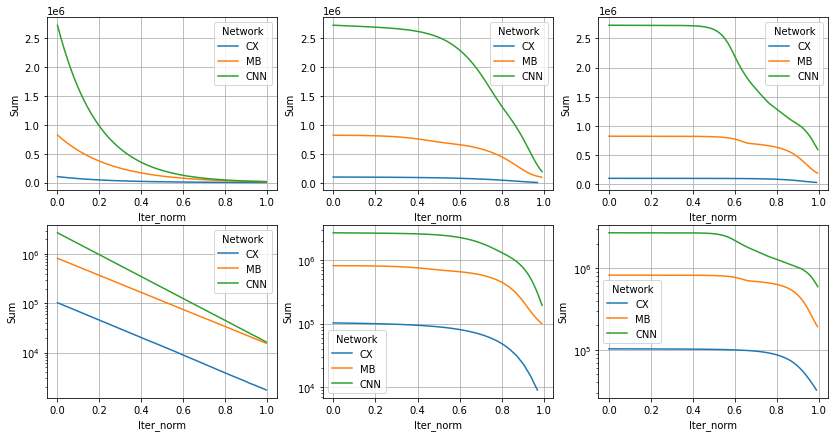

In [31]:
fig,ax=plt.subplots(2,3, figsize=(14,7))
sns.lineplot(data=network_random_mean, x='Iter_norm',y='Sum',hue="Network",ax=ax[0, 0])
sns.lineplot(data=network_binomial_mean, x='Iter_norm',y='Sum',hue="Network",ax=ax[0, 1])
sns.lineplot(data=network_preferential_mean, x='Iter_norm',y='Sum',hue="Network",ax=ax[0, 2])

ax[0, 0].grid()
ax[0, 1].grid()
ax[0, 2].grid()
ax[1, 0].grid()
ax[1, 1].grid()
ax[1, 2].grid()

sns.lineplot(data=network_random_mean, x='Iter_norm',y='Sum',hue="Network",ax=ax[1, 0])
sns.lineplot(data=network_binomial_mean, x='Iter_norm',y='Sum',hue="Network",ax=ax[1, 1])
sns.lineplot(data=network_preferential_mean, x='Iter_norm',y='Sum',hue="Network",ax=ax[1, 2])
ax[1, 0].set_yscale('log')

ax[1, 1].set_yscale('log')

ax[1, 2].set_yscale('log')

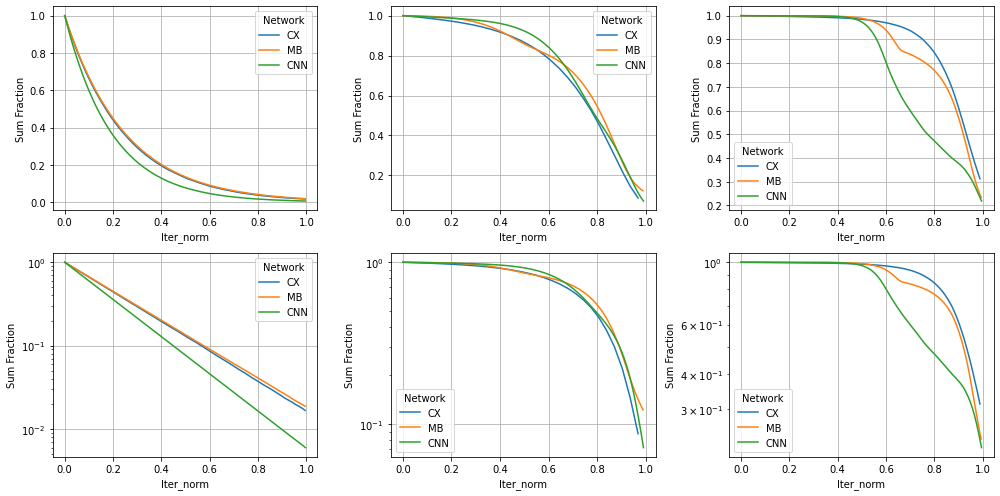

In [32]:
fig,ax=plt.subplots(2,3, figsize=(14,7))
sns.lineplot(data=network_random_mean, x='Iter_norm',y='Sum Fraction',hue="Network",ax=ax[0, 0])
sns.lineplot(data=network_binomial_mean, x='Iter_norm',y='Sum Fraction',hue="Network",ax=ax[0, 1])
sns.lineplot(data=network_preferential_mean, x='Iter_norm',y='Sum Fraction',hue="Network",ax=ax[0, 2])

ax[0, 0].grid()
ax[0, 1].grid()
ax[0, 2].grid()
ax[1, 0].grid()
ax[1, 1].grid()
ax[1, 2].grid()

sns.lineplot(data=network_random_mean, x='Iter_norm',y='Sum Fraction',hue="Network",ax=ax[1, 0])
sns.lineplot(data=network_binomial_mean, x='Iter_norm',y='Sum Fraction',hue="Network",ax=ax[1, 1])
sns.lineplot(data=network_preferential_mean, x='Iter_norm',y='Sum Fraction',hue="Network",ax=ax[1, 2])
ax[1, 0].set_yscale('log')

ax[1, 1].set_yscale('log')

ax[1, 2].set_yscale('log')
fig.tight_layout()

In [34]:
network_random_mean.keys()

Index(['In-Degree Cenrality', 'Out-Degree Cenrality', 'Degree',
       'Neighbor Degree', 'Density', 'Transitivity', 'Reciprocity', 'Sum',
       'Sum Fraction', 'Iter', 'Iter_norm', 'Network'],
      dtype='object')

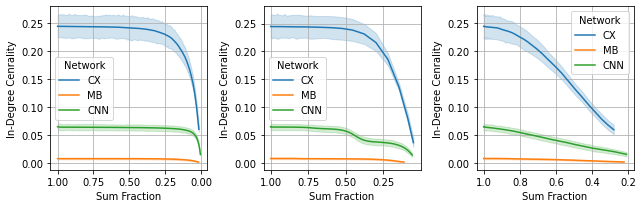

In [51]:
fig,ax=plt.subplots(1,3, figsize=(9,3))
sns.lineplot(data=network_random, x='Sum Fraction',y='In-Degree Cenrality',hue="Network",ax=ax[0])
sns.lineplot(data=network_binomial, x='Sum Fraction',y='In-Degree Cenrality',hue="Network",ax=ax[1])
sns.lineplot(data=network_preferential, x='Sum Fraction',y='In-Degree Cenrality',hue="Network",ax=ax[2])

ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[0].invert_xaxis()
ax[1].invert_xaxis()
ax[2].invert_xaxis()

fig.tight_layout()

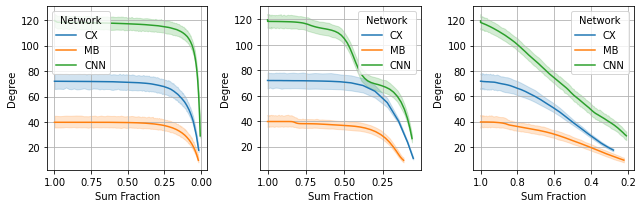

In [50]:
fig,ax=plt.subplots(1,3, figsize=(9,3))
sns.lineplot(data=network_random, x='Sum Fraction',y='Degree',hue="Network",ax=ax[0])
sns.lineplot(data=network_binomial, x='Sum Fraction',y='Degree',hue="Network",ax=ax[1])
sns.lineplot(data=network_preferential, x='Sum Fraction',y='Degree',hue="Network",ax=ax[2])

ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[0].invert_xaxis()
ax[1].invert_xaxis()
ax[2].invert_xaxis()

fig.tight_layout()

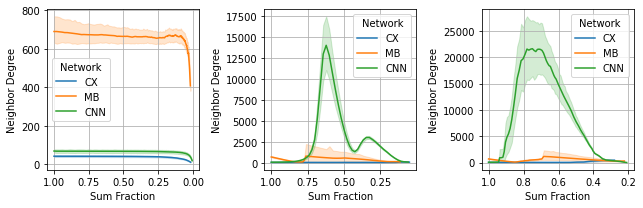

In [52]:
fig,ax=plt.subplots(1,3, figsize=(9,3))
sns.lineplot(data=network_random, x='Sum Fraction',y='Neighbor Degree',hue="Network",ax=ax[0])
sns.lineplot(data=network_binomial, x='Sum Fraction',y='Neighbor Degree',hue="Network",ax=ax[1])
sns.lineplot(data=network_preferential, x='Sum Fraction',y='Neighbor Degree',hue="Network",ax=ax[2])

ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[0].invert_xaxis()
ax[1].invert_xaxis()
ax[2].invert_xaxis()

fig.tight_layout()

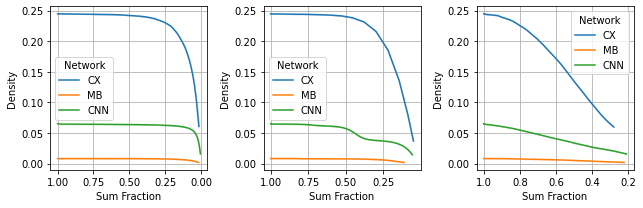

In [53]:
fig,ax=plt.subplots(1,3, figsize=(9,3))
sns.lineplot(data=network_random, x='Sum Fraction',y='Density',hue="Network",ax=ax[0])
sns.lineplot(data=network_binomial, x='Sum Fraction',y='Density',hue="Network",ax=ax[1])
sns.lineplot(data=network_preferential, x='Sum Fraction',y='Density',hue="Network",ax=ax[2])

ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[0].invert_xaxis()
ax[1].invert_xaxis()
ax[2].invert_xaxis()

fig.tight_layout()

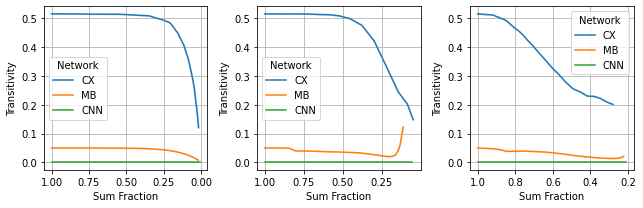

In [55]:
fig,ax=plt.subplots(1,3, figsize=(9,3))
sns.lineplot(data=network_random, x='Sum Fraction',y='Transitivity',hue="Network",ax=ax[0])
sns.lineplot(data=network_binomial, x='Sum Fraction',y='Transitivity',hue="Network",ax=ax[1])
sns.lineplot(data=network_preferential, x='Sum Fraction',y='Transitivity',hue="Network",ax=ax[2])

ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[0].invert_xaxis()
ax[1].invert_xaxis()
ax[2].invert_xaxis()

fig.tight_layout()

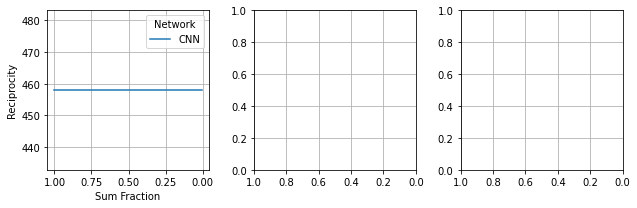

In [61]:
fig,ax=plt.subplots(1,3, figsize=(9,3))
sns.lineplot(data=network_random_mean[network_random_mean.Network=="CNN"], x='Sum Fraction',y='Reciprocity',hue="Network",ax=ax[0])
# sns.lineplot(data=network_binomial_mean, x='Sum Fraction',y='Reciprocity',hue="Network",ax=ax[1])
# sns.lineplot(data=network_preferential_mean, x='Sum Fraction',y='Reciprocity',hue="Network",ax=ax[2])

ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[0].invert_xaxis()
ax[1].invert_xaxis()
ax[2].invert_xaxis()

fig.tight_layout()

In [58]:
network_random_mean

,In-Degree Cenrality,Out-Degree Cenrality,Degree,Neighbor Degree,Density,Transitivity,Reciprocity,Sum,Sum Fraction,Iter,Iter_norm,Network
0,0.244806,1.442421e+09,71.972973,42.440589,0.244806,0.515426,1.442421e+09,103050.0,1.000000,0,0.000000,CX
1,0.244806,1.442421e+09,71.972973,42.418893,0.244806,0.515426,1.442421e+09,100982.0,0.979932,1,0.004950,CX
2,0.244714,1.442421e+09,71.945946,42.399648,0.244714,0.515179,1.442421e+09,98917.0,0.959893,2,0.009901,CX
3,0.244668,1.442421e+09,71.932432,42.398925,0.244668,0.515319,1.442421e+09,96918.0,0.940495,3,0.014851,CX
4,0.244668,1.442421e+09,71.932432,42.393974,0.244668,0.515319,1.442421e+09,94883.0,0.920747,4,0.019802,CX
...,...,...,...,...,...,...,...,...,...,...,...,...
249,0.017296,4.580000e+02,31.685932,21.080024,0.017296,0.000000,4.580000e+02,17734.0,0.006509,249,0.980315,CNN
250,0.016993,4.580000e+02,31.131952,20.808259,0.016993,0.000000,4.580000e+02,17373.0,0.006376,250,0.984252,CNN
251,0.016735,4.580000e+02,30.658670,20.461358,0.016735,0.000000,4.580000e+02,17040.0,0.006254,251,0.988189,CNN
252,0.016477,4.580000e+02,30.185387,20.057735,0.016477,0.000000,4.580000e+02,16701.0,0.006130,252,0.992126,CNN
